In [2]:
%matplotlib inline
import sys
sys.path.append('../fitting')
sys.path.append('../visualising')
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import pandas as pd
import numpy as np
from plasmapy.physics import dimensionless
import astropy.units as u
import astropy.constants as const

from heliopy.data import helios

import vis_helpers as helpers
from helpers import mplhelp
from helpers import helioshelp
from plot_fitted_dist_alphas import plot_dist_time

In [5]:
# Set probe and dates to compare here
probe = '2'
starttime = datetime(1976, 4, 13)
endtime = starttime + timedelta(days=10)

merged = helios.merged(probe, starttime, endtime)
alphas = helpers.load_alphafit(probe, starttime, endtime)
protons = helios.corefit(probe, starttime, endtime, try_download=False)

1976 104
1976 105


100.0% 811008 / 803113




1976 106 Processed ascii file


100.0% 909312 / 903005




1976 107 Processed ascii file


100.0% 901120 / 894165




1976 108 Processed ascii file


100.0% 909312 / 907867




1976 109 Processed ascii file


100.0% 671744 / 669187




1976 110 Processed ascii file


100.0% 901120 / 896375




1976 111 Processed ascii file


100.0% 892928 / 887977




1976 112 Processed ascii file


100.0% 589824 / 582113




1976 113 Processed ascii file


100.0% 442368 / 436695




1976 114 Processed ascii file
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_104_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_105_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_106_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_107_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_108_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_109_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_110_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_111_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_112_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_113_alpha_fits.hdf
/Users/dstansby/Data/helios/fits/helios2/fits/1976/h2_1976_114_alpha_fits.hdf


In [6]:
protons = helioshelp.calculate_derived(protons)

alphas[['Bx', 'By', 'Bz', '|B|']] = protons[['Bx', 'By', 'Bz', '|B|']]
alphas['Beta_par'] = alphas['Ta_par'] * const.k_B.value * alphas['n_a'] * 1e6 / (alphas['|B|']**2 * 1e-18 / (2 * const.mu0))
alphas['Tani'] = alphas['Ta_perp'] / alphas['Ta_par']

New keys:
 Index(['B instrument', 'Bx', 'By', 'Bz', 'sigma B', 'Ion instrument', 'Status',
       'Tp_par', 'Tp_perp', 'carrot', 'r_sun', 'clat', 'clong',
       'earth_he_angle', 'n_p', 'vp_x', 'vp_y', 'vp_z', 'vth_p_par',
       'vth_p_perp', '|B|', '|v|', 'Tp_tot', 'p_mag', 'p_th_par', 'p_th_tot',
       'Beta', 'Beta_tot', 'Tani', 'n_p_norm', 'mass_flux', 'Entropy', 'va_x',
       'va_y', 'va_z', '|va|'],
      dtype='object')


In [7]:
merged.keys()

Index(['rh', 'esh', 'clong', 'clat', 'HGIlong', 'br', 'bt', 'bn', 'vp1r',
       'vp1t', 'vp1n', 'crot', 'np1', 'vp1', 'Tp1', 'vaz', 'vel', 'Bx', 'By',
       'Bz', 'sBx', 'sBy', 'sBz', 'nal', 'val', 'Tal', 'np2', 'vp2'],
      dtype='object')

(721460.0, 721461.0)

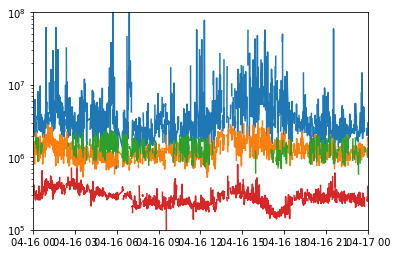

In [19]:
fig, ax = plt.subplots()
ax.plot(alphas['Ta_par'] / 2)
ax.plot(alphas['Ta_perp'] / 2)
ax.plot(merged['Tal'])
ax.plot(protons['Tp_par'])

ax.set_yscale('log')
ax.set_ylim(1e5, 1e8)
ax.set_xlim(starttime + timedelta(days=3), starttime + timedelta(days=4))